## Let's train three classifiers on both the methods: undersampled data and SMOTE data

In [57]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## 1. **Logistic Regression**
#### Undersampled data


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       110
           1       0.97      0.86      0.91        87

    accuracy                           0.93       197
   macro avg       0.94      0.92      0.93       197
weighted avg       0.93      0.93      0.93       197

Logistic Regression Confusion Matrix:
[[108   2]
 [ 12  75]]
Logistic Regression ROC AUC Score:
0.9709508881922675
Logistic Regression Accuracy Score:
0.9289340101522843
Logistic Regression Precision Score:
0.974025974025974
Logistic Regression Recall Score:
0.8620689655172413
Logistic Regression F1 Score:
0.9146341463414634


C:\Users\caaka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


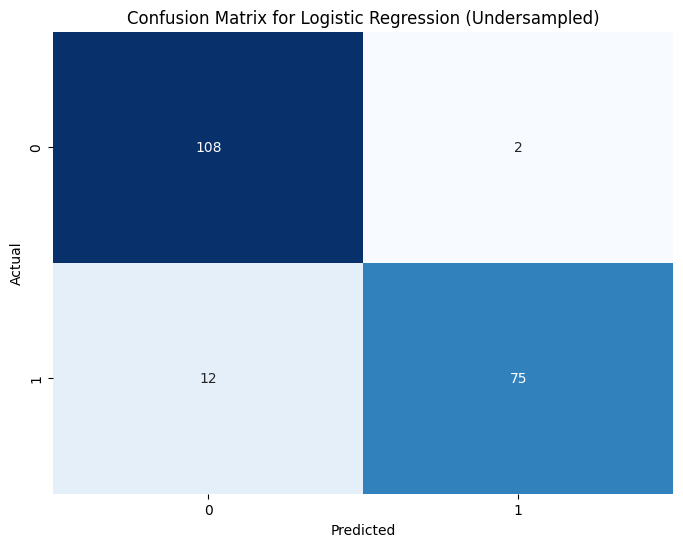

['../outputs/models/logistic_regression_model_undersampled.pkl']

In [58]:
# Loading the balanced data
X_train = joblib.load('../data/undersampled/X_train_undersampled.pkl')
y_train = joblib.load('../data/undersampled/y_train_undersampled.pkl')
X_test = joblib.load('../data/undersampled/X_test_undersampled.pkl')
y_test = joblib.load('../data/undersampled/y_test_undersampled.pkl')

# Applying Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_proba = logreg.predict_proba(X_test)[:, 1]

# Evaluating Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

print("Logistic Regression ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_logreg_proba))
print("Logistic Regression Accuracy Score:")
print(accuracy_score(y_test, y_pred_logreg))

print("Logistic Regression Precision Score:")
print(precision_score(y_test, y_pred_logreg))

print("Logistic Regression Recall Score:")
print(recall_score(y_test, y_pred_logreg))
print("Logistic Regression F1 Score:")
print(f1_score(y_test, y_pred_logreg))

# Visualizing the confusion matrix
cm_logreg_undersampled = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg_undersampled, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression (Undersampled)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('../outputs/plots/confusion_matrix_logistic_regression_undersampled.png')
plt.show()




# save the model
joblib.dump(logreg, '../outputs/models/logistic_regression_model_undersampled.pkl')




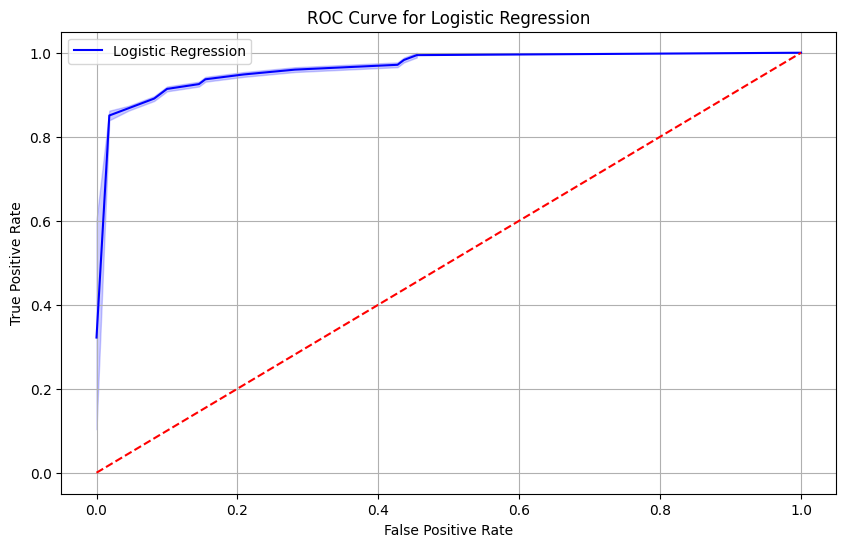

In [59]:
# Visualizing the ROC curve for Logistic Regression
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_logreg_proba)
plt.figure(figsize=(10, 6))
sns.lineplot(x=fpr_logreg, y=tpr_logreg, label='Logistic Regression', color='blue')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('../outputs/plots/roc_curve_logistic_regression_undersampled.png')
plt.grid()
plt.show()

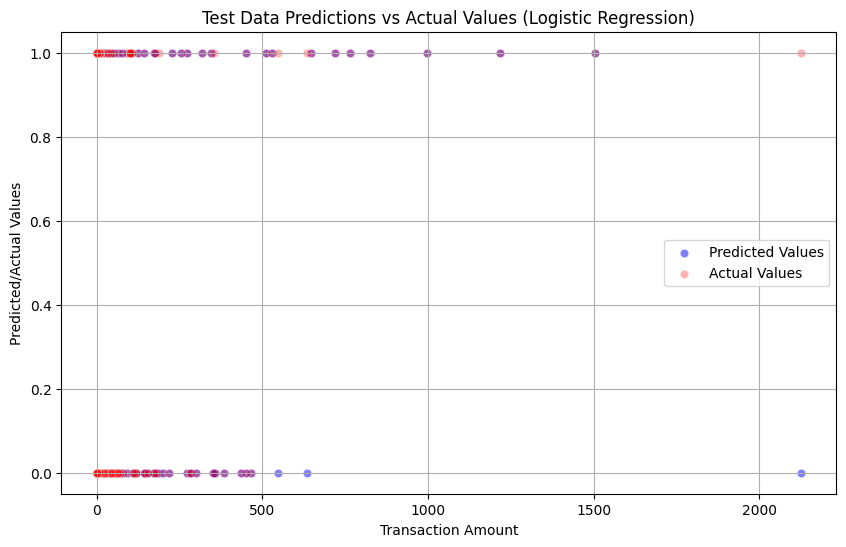

In [60]:
# Visualizing test data predictions on the trained model against actual values (y_test vs y_pred_logreg)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Amount'], y=y_pred_logreg, alpha=0.5, label='Predicted Values', color='blue')
sns.scatterplot(x=X_test['Amount'], y=y_test, alpha=0.3, label='Actual Values', color='red')
plt.title('Test Data Predictions vs Actual Values (Logistic Regression)')
plt.xlabel('Transaction Amount')
plt.ylabel('Predicted/Actual Values')
plt.legend()
plt.grid()
plt.savefig('../outputs/plots/test_data_predictions_logistic_regression_undersampled.png')
plt.show()

#### We can see that the accuracy score is 0.92, which is a good score. The model is able to correctly classify 92% of the positive and negative classes. The confusion matrix shows that the model has a high true positive rate and a low false positive rate, indicating that it is performing well on the undersampled data.

#### SMOTE data

C:\Users\caaka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.14      0.92      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.95      0.62     56962
weighted avg       1.00      0.99      0.99     56962

Logistic Regression Confusion Matrix:
[[56306   558]
 [    8    90]]
Logistic Regression ROC AUC Score:
0.9779829137620157
Logistic Regression Accuracy Score:
0.9900635511393561
Logistic Regression Precision Score:
0.1388888888888889
Logistic Regression Recall Score:
0.9183673469387755
Logistic Regression F1 Score:
0.24128686327077747


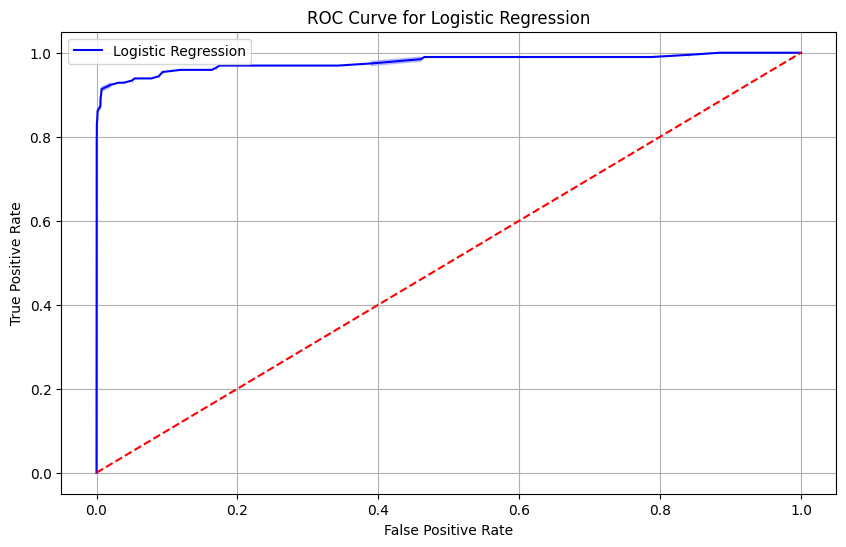

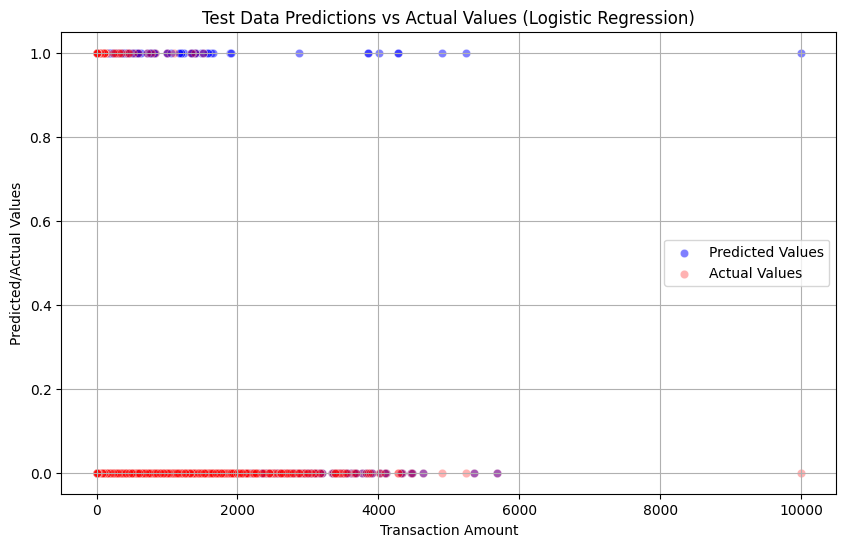

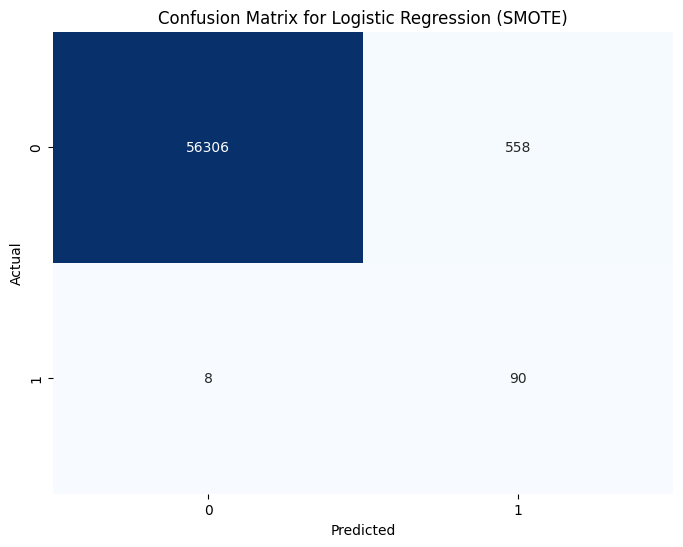

['../outputs/models/logistic_regression_model_smote.pkl']

In [61]:
# loading data for logistic regression
X_train = joblib.load('../data/smote/X_train_smote.pkl')
y_train = joblib.load('../data/smote/y_train_smote.pkl')
X_test = joblib.load('../data/smote/X_test_smote.pkl')
y_test = joblib.load('../data/smote/y_test_smote.pkl')

# Applying Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_proba = logreg.predict_proba(X_test)[:, 1]

# Evaluating Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

print("Logistic Regression ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_logreg_proba))
print("Logistic Regression Accuracy Score:")
print(accuracy_score(y_test, y_pred_logreg))

print("Logistic Regression Precision Score:")
print(precision_score(y_test, y_pred_logreg))

print("Logistic Regression Recall Score:")
print(recall_score(y_test, y_pred_logreg))
print("Logistic Regression F1 Score:")
print(f1_score(y_test, y_pred_logreg))

# Visualizing the ROC curve for Logistic Regression
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_logreg_proba)
plt.figure(figsize=(10, 6))
sns.lineplot(x=fpr_logreg, y=tpr_logreg, label='Logistic Regression', color='blue')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.savefig('../outputs/plots/roc_curve_logistic_regression_smote.png')
plt.show()

# Visualizing test data predictions on the trained model against actual values (y_test vs y_pred_logreg)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Amount'], y=y_pred_logreg, alpha=0.5, label='Predicted Values', color='blue')
sns.scatterplot(x=X_test['Amount'], y=y_test, alpha=0.3, label='Actual Values', color='red')
plt.title('Test Data Predictions vs Actual Values (Logistic Regression)')
plt.xlabel('Transaction Amount')
plt.ylabel('Predicted/Actual Values')
plt.legend()
plt.grid()
plt.savefig('../outputs/plots/test_data_predictions_logistic_regression_smote.png')
plt.show()


# Visualizing the confusion matrix
cm_logreg_smote = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg_smote, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression (SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('../outputs/plots/confusion_matrix_logistic_regression_smote.png')
plt.show()



# save the model
joblib.dump(logreg, '../outputs/models/logistic_regression_model_smote.pkl')

#### From the above graph, we can see that the accuracy score is 0.99, which is an excellent score but the precision score is 0.138 which indicates that the model is not performing well on the positive class and the confusion matrix has very high values, indicating a lot of false positives. This is a fairly plausible result as synthetic data is not always a good representation of the real data.

## 2. **Random Forest Classifier**

### undersampled data

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       110
           1       1.00      0.84      0.91        87

    accuracy                           0.93       197
   macro avg       0.94      0.92      0.93       197
weighted avg       0.94      0.93      0.93       197

Random Forest Confusion Matrix:
[[110   0]
 [ 14  73]]
Random Forest ROC AUC Score:
0.9780564263322884
Random Forest Accuracy Score:
0.9289340101522843
Random Forest Precision Score:
1.0
Random Forest Recall Score:
0.8390804597701149
Random Forest F1 Score:
0.9125


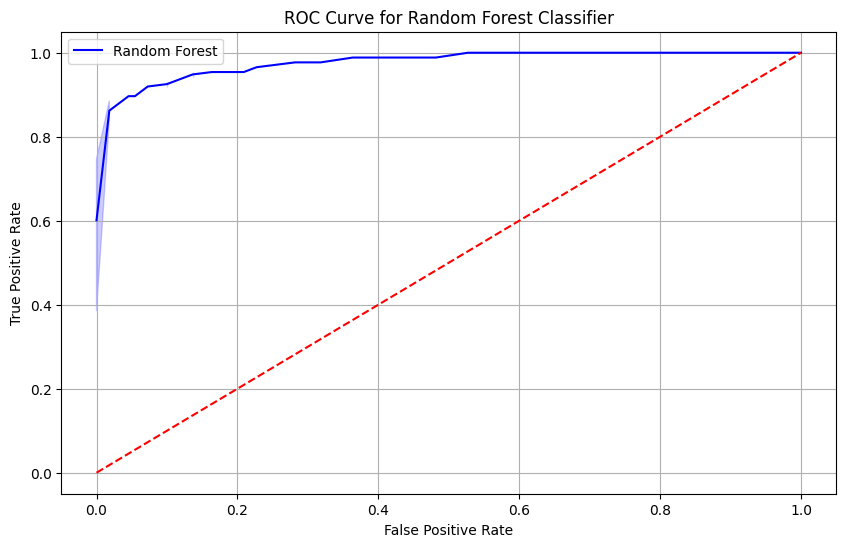

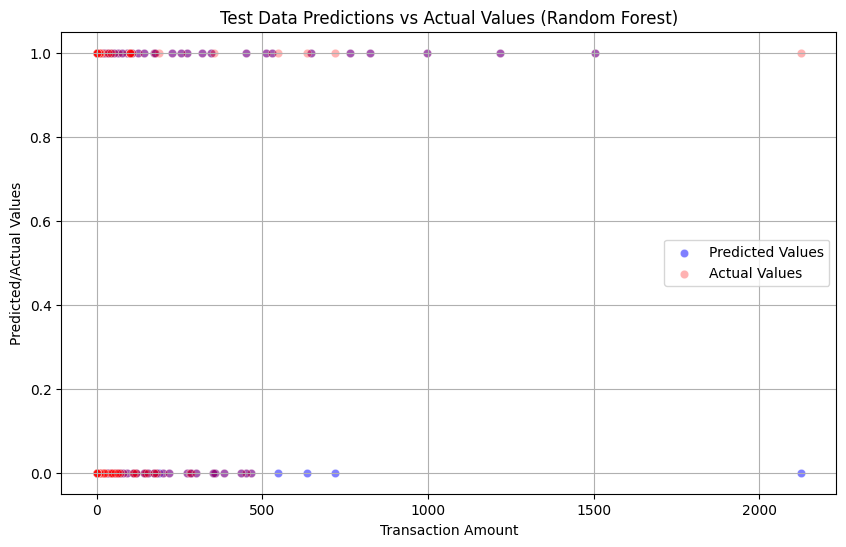

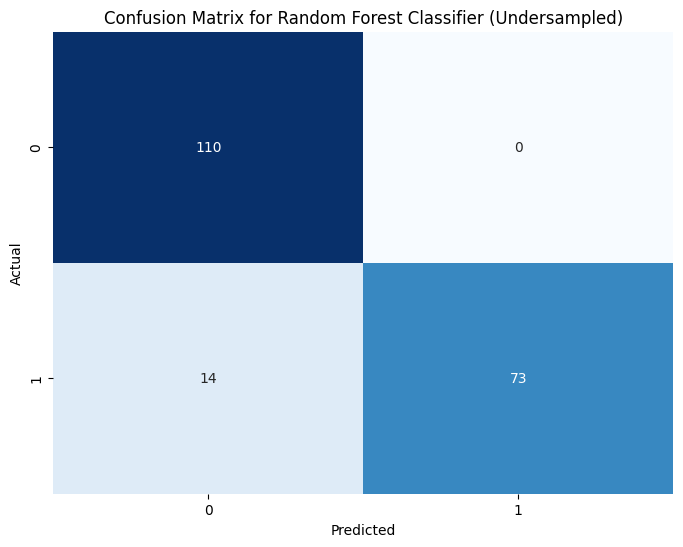

['../outputs/models/random_forest_model_undersampled.pkl']

In [62]:
# Applying Random Forest Classifier

# loading data for random forest classifier
X_train = joblib.load('../data/undersampled/X_train_undersampled.pkl')
y_train = joblib.load('../data/undersampled/y_train_undersampled.pkl')
X_test = joblib.load('../data/undersampled/X_test_undersampled.pkl')
y_test = joblib.load('../data/undersampled/y_test_undersampled.pkl')

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf_proba = rf.predict_proba(X_test)[:, 1]
# Evaluating Random Forest Classifier
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("Random Forest ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_rf_proba))

print("Random Forest Accuracy Score:")
print(accuracy_score(y_test, y_pred_rf))
print("Random Forest Precision Score:")
print(precision_score(y_test, y_pred_rf))
print("Random Forest Recall Score:")
print(recall_score(y_test, y_pred_rf))
print("Random Forest F1 Score:")
print(f1_score(y_test, y_pred_rf))

# ROC curve for Random Forest Classifier
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf_proba)
plt.figure(figsize=(10, 6))
sns.lineplot(x=fpr_rf, y=tpr_rf, label='Random Forest', color='blue')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve for Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.savefig('../outputs/plots/roc_curve_random_forest_undersampled.png')
plt.show()


# Visualizing test data predictions on the trained model against actual values (y_test vs y_pred_rf)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Amount'], y=y_pred_rf, alpha=0.5, label='Predicted Values', color='blue')
sns.scatterplot(x=X_test['Amount'], y=y_test, alpha=0.3, label='Actual Values', color='red')
plt.title('Test Data Predictions vs Actual Values (Random Forest)')
plt.xlabel('Transaction Amount')
plt.ylabel('Predicted/Actual Values')
plt.legend()
plt.grid()
plt.savefig('../outputs/plots/test_data_predictions_random_forest_undersampled.png')
plt.show()


# Visualizing the confusion matrix
cm_rf_undersampled = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_undersampled, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest Classifier (Undersampled)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('../outputs/plots/confusion_matrix_random_forest_undersampled.png')
plt.show()


# save the model
joblib.dump(rf, '../outputs/models/random_forest_model_undersampled.pkl')




#### From the above graph and report, we can see that the accuracy score is the same as the logistic regression model, which is 0.92. But it has higher false negative rates (14) than the logistic regression model (12). This makes a crucial difference as it is a credit card fraud detection model, so the model should have a low false negative rate.

## SVC

#### Undersampled data

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.49      0.57       110
           1       0.52      0.69      0.59        87

    accuracy                           0.58       197
   macro avg       0.59      0.59      0.58       197
weighted avg       0.60      0.58      0.58       197

SVC Confusion Matrix:
[[54 56]
 [27 60]]
SVC ROC AUC Score:
0.5711598746081505
SVC Accuracy Score:
0.5786802030456852
SVC Precision Score:
0.5172413793103449
SVC Recall Score:
0.6896551724137931
SVC F1 Score:
0.5911330049261084


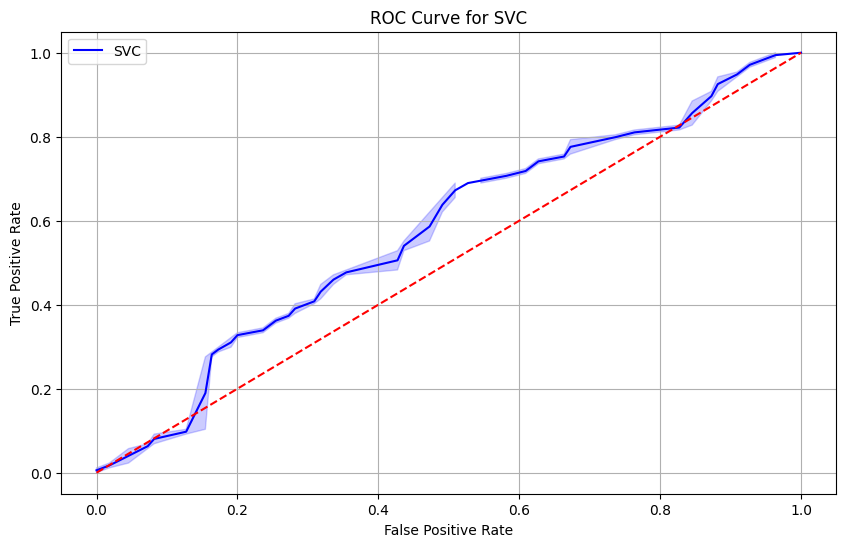

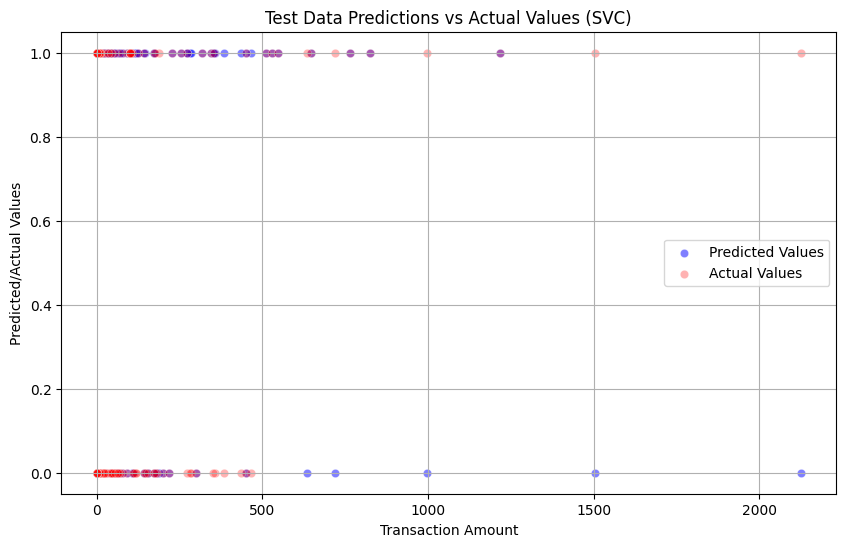

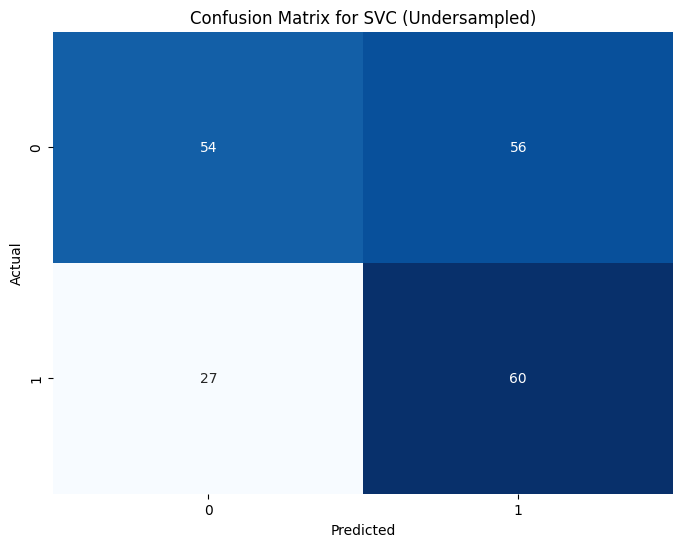

In [63]:
# Loading data for SVC

X_train = joblib.load('../data/undersampled/X_train_undersampled.pkl')
y_train = joblib.load('../data/undersampled/y_train_undersampled.pkl')
X_test = joblib.load('../data/undersampled/X_test_undersampled.pkl')
y_test = joblib.load('../data/undersampled/y_test_undersampled.pkl')

# Applying SVC
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
y_pred_svc_proba = svc.predict_proba(X_test)[:, 1]
# Evaluating SVC
print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))
print("SVC Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))

print("SVC ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_svc_proba))
print("SVC Accuracy Score:")
print(accuracy_score(y_test, y_pred_svc))
print("SVC Precision Score:")
print(precision_score(y_test, y_pred_svc))
print("SVC Recall Score:")
print(recall_score(y_test, y_pred_svc))
print("SVC F1 Score:")
print(f1_score(y_test, y_pred_svc))

# ROC curve for SVC
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_pred_svc_proba)
plt.figure(figsize=(10, 6))
sns.lineplot(x=fpr_svc, y=tpr_svc, label='SVC', color='blue')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve for SVC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.savefig('../outputs/plots/roc_curve_svc_undersampled.png')
plt.show()


joblib.dump(svc, '../outputs/models/svc_model_undersampled.pkl')

# Visualizing test data predictions on the trained model against actual values (y_test vs y_pred_svc)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Amount'], y=y_pred_svc, alpha=0.5, label='Predicted Values', color='blue')
sns.scatterplot(x=X_test['Amount'], y=y_test, alpha=0.3, label='Actual Values', color='red')
plt.title('Test Data Predictions vs Actual Values (SVC)')
plt.xlabel('Transaction Amount')
plt.ylabel('Predicted/Actual Values')
plt.legend()
plt.grid()
plt.savefig('../outputs/plots/test_data_predictions_svc_undersampled.png')
plt.show()


# Visualizing the confusion matrix
cm_svc_undersampled = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc_undersampled, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for SVC (Undersampled)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('../outputs/plots/confusion_matrix_svc_undersampled.png')
plt.show()


#### From the above scores and graph, it is clear the SVC has the least accuracy out of all the classifiers. The model is not able to correctly classify the positive and negative classes.

## Conclusions:
- The Logistic Regression model performed the best on the undersampled data with an accuracy score of 0.928 and a high true positive rate and less false negative rate. This is the best model for this dataset as it is able to correctly classify the positive and negative classes with a good accuracy score.
- The SMOTE technique is not preferred for this dataset as it does not provide a good representation of the real data. Since it is a real dataset of a critical problem (Credit Card Fraud Detection), it is better to use the undersampled data for training the model and not to add synthetic data.
- The Random Forest Classifier performed well on the undersampled data with an accuracy score of 0.928 but had a higher false negative rate than the Logistic Regression model and hence is not preferred.
- The SVC model has the least accuracy score of 0.57 and is not able to correctly classify the positive and negative classes. This model is not preferred for this dataset.